In [1]:
import glob

In [2]:
strt = '1993-10-1'
nd = '2013-09-30'

In [3]:
def parse_date(df):
    return '%i-%i-%i'%(df.year,df.month,df.day)

def readfile(fl):
    dat = pd.read_table(fl,sep=' ')
    dat['ET'] = dat.trans+dat.evap
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat['wateryear'] = dat.index.map(rut.wateryear)
    
    return dat[strt:nd]

In [4]:
def process(df):
    fl = df['file']
    year = int(fl.split('_')[-2])
    run = int(fl.split('_')[-3][-1])
    track = '%s_%s'%(fl.split('/')[-1].split('_')[0],fl.split('/')[-1].split('_')[1])
        
    dat = readfile(fl)
    vals = dat.streamflow.as_matrix()
    
    # compute some dataset whole values
    R_P = dat.streamflow.sum()/dat.precip.sum()
    LAI = dat.lai.mean()
    ET = dat.ET.mean()
    
    # summarize by water year
    dat2 = dat.groupby(by='wateryear').mean()
    dat2['R_P'] = dat2.streamflow/dat2.precip
    
    # some values
    R_P_min = dat2.R_P.min()
    R_P_max = dat2.R_P.max()
    P = dat2.precip.mean()
    Q = dat2.streamflow.mean() 
    SWE = dat.groupby(by='wateryear').max().snowpack.mean()
    
    
    return [year,run,track,R_P,LAI,R_P_min,R_P_max,Q,P,SWE,ET,vals]

In [5]:
df = pd.DataFrame({'file':glob.glob('/RHESSys/Como/out/exp/*_basin.daily')})

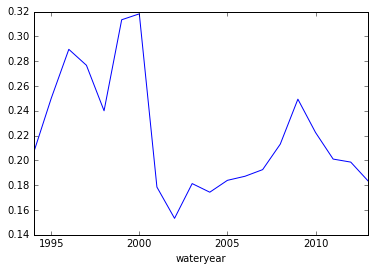

In [6]:
tmp = readfile(df['file'][0])
tmp = tmp.groupby(by='wateryear').mean()
tmp['Q_P'] = tmp.streamflow/tmp.precip
tmp.Q_P.plot()

In [7]:
res = df.apply(process,axis=1)

In [8]:
years,runs,tracks,R_Ps,LAIs,R_P_mins,R_P_maxs,Q,P,SWE,ET,SF = zip(*res)
df['year'] = years
df['run'] = runs
df['track'] = tracks
df['R_P'] = R_Ps
df['LAI'] = LAIs
df['R_Pmin'] = R_P_mins
df['R_Pmax'] = R_P_maxs
df['Q'] = Q
df['P'] = P
df['SWE'] = SWE
df['ET'] = ET
df['streamflow'] = SF

In [9]:
del df['file']

In [11]:
df.to_pickle('./data/experiment_results.pcl')

In [12]:
LP = df.loc[df.track=='PGW_LP'].groupby(by='year')
MP = df.loc[df.track=='PGW_MP'].groupby(by='year')

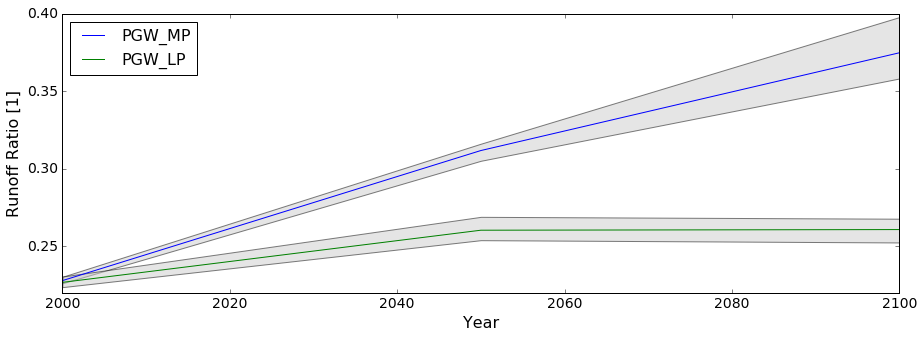

In [16]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().R_P, label='PGW_MP')
plt.fill_between(MP.min().index,MP.min().R_P,MP.max().R_P,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().R_P, label='PGW_LP')
plt.fill_between(LP.min().index,LP.min().R_P,LP.max().R_P,facecolor='0.8',alpha=0.5)
plt.ylabel('Runoff Ratio [1]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/experiment_runoff_ratio.png',dpi=300,bbox_inches='tight')

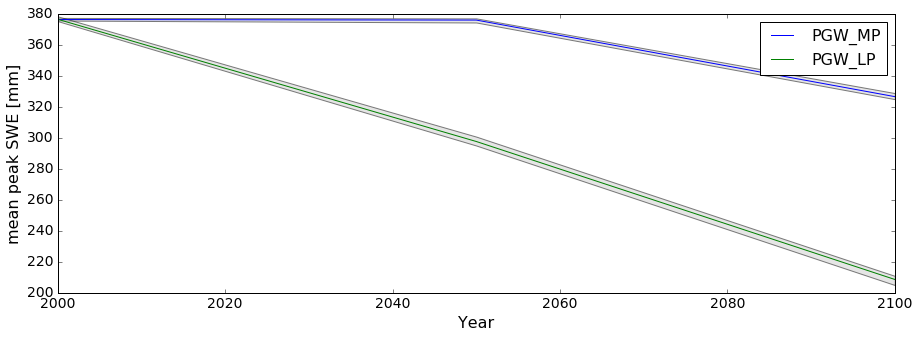

In [17]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().SWE, label='PGW_MP')
plt.fill_between(MP.min().index,MP.min().SWE,MP.max().SWE,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().SWE, label='PGW_LP')
plt.fill_between(LP.min().index,LP.min().SWE,LP.max().SWE,facecolor='0.8',alpha=0.5)
plt.ylabel('mean peak SWE [mm]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/experiment_mean_peakSWE.png',dpi=300,bbox_inches='tight')

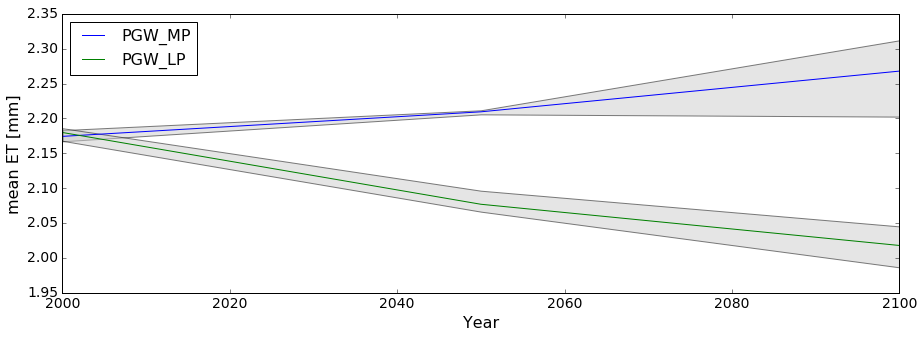

In [18]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().ET, label='PGW_MP')
plt.fill_between(MP.min().index,MP.min().ET,MP.max().ET,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().ET, label='PGW_LP')
plt.fill_between(LP.min().index,LP.min().ET,LP.max().ET,facecolor='0.8',alpha=0.5)
plt.ylabel('mean ET [mm]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/experiment_mean_ET.png',dpi=300,bbox_inches='tight')

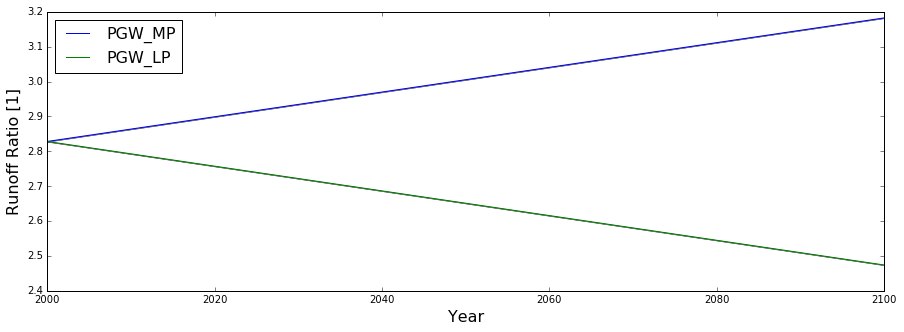

In [19]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().P, label='PGW_MP')
plt.fill_between(MP.min().index,MP.min().P,MP.max().P,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().P, label='PGW_LP')
plt.fill_between(LP.min().index,LP.min().P,LP.max().P,facecolor='0.8',alpha=0.5)
plt.ylabel('Runoff Ratio [1]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)

In [20]:
QP_change_mean = pd.DataFrame()
QP_change_min = pd.DataFrame()
QP_change_max = pd.DataFrame()

In [21]:
control = MP.mean().loc[MP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_MP']=((MP.mean()['R_P']/control)*100-100).round(1)
control = LP.mean().loc[LP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_LP']=((LP.mean()['R_P']/control)*100-100).round(1)

In [22]:
control = MP.min().loc[MP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_MP']=((MP.min()['R_P']/control)*100-100).round(1)
control = LP.min().loc[LP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_LP']=((LP.min()['R_P']/control)*100-100).round(1)

In [23]:
control = MP.max().loc[MP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_MP']=((MP.max()['R_P']/control)*100-100).round(1)
control = LP.max().loc[LP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_LP']=((LP.max()['R_P']/control)*100-100).round(1)

In [24]:
QP_change_mean

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2050,36.8,14.8
2100,64.5,15.0


In [25]:
QP_change_min

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2050,34.9,13.6
2100,58.4,12.9


In [26]:
QP_change_max

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2050,37.3,16.7
2100,72.7,16.2


### Compute Annual Hydrographs

In [27]:
dates = pd.date_range(strt,nd)
dowy = dates.map(rut.DOWY)

/Users/barnhatb/Dropbox/python/bin/rhessys/utilities.py:83: FutureWarning: pandas.core.datetools.datetime is deprecated. Please use datetime.datetime instead.
  ref = pd.datetools.datetime(int(wy)-1,10,1) # set the beginning of the water year


In [28]:
dowys = []
tracks = []
vals = []
years = []

for i in range(len(df)):
    sf = df.streamflow[i] # pull out the streamflow array
    for val,d in zip(sf,dowy):
        tracks.append(df.track[i])
        dowys.append(d)
        years.append(df.year[i])
        vals.append(val)

In [29]:
sf = pd.DataFrame({'dowy':dowys,'track':tracks,'year':years,'val':vals})

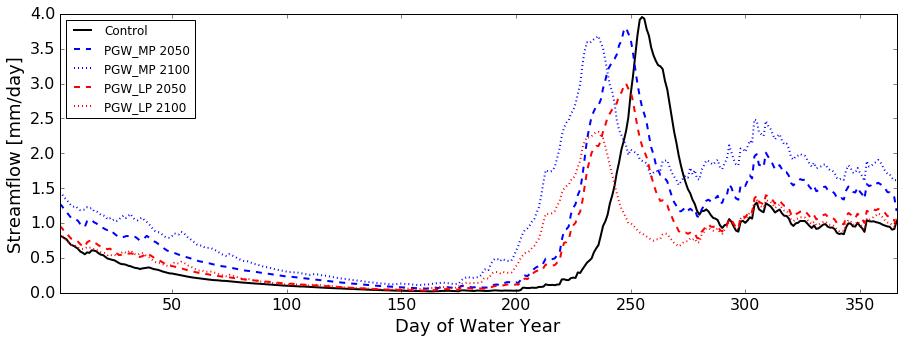

In [34]:
labelfont=18

sf.loc[(sf.track=='PGW_MP') & (sf.year==2000)].groupby('dowy').mean()['val'].plot(c='k',
                                    lw =2, label = 'Control', figsize=(15,5))
sf.loc[(sf.track=='PGW_MP') & (sf.year==2050)].groupby('dowy').mean()['val'].plot(c='b',
                                    lw =2,ls='--',label='PGW_MP 2050')
sf.loc[(sf.track=='PGW_MP') & (sf.year==2100)].groupby('dowy').mean()['val'].plot(c='b',
                                    lw =2,ls=':',label='PGW_MP 2100')
sf.loc[(sf.track=='PGW_LP') & (sf.year==2050)].groupby('dowy').mean()['val'].plot(c='r',
                                    lw =2,ls='--',label='PGW_LP 2050')
sf.loc[(sf.track=='PGW_LP') & (sf.year==2100)].groupby('dowy').mean()['val'].plot(c='r',
                                    lw =2,ls=':',label='PGW_LP 2100')
plt.legend(loc='upper left')
ax = plt.gca()
[tick.label.set_fontsize(labelfont-2) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(labelfont-2) for tick in ax.yaxis.get_major_ticks()];

plt.xlabel('Day of Water Year', fontsize=labelfont)
plt.ylabel('Streamflow [mm/day]', fontsize=labelfont)
ax = plt.gca()
[tick.label.set_fontsize(16) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(16) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/experiment_annual_hydrograph.png',dpi=300,bbox_inches='tight')